In [1]:
import statsmodels.api as sm
dta = sm.datasets.sunspots.load_pandas().data

In [4]:
import matplotlib.pyplot as plt

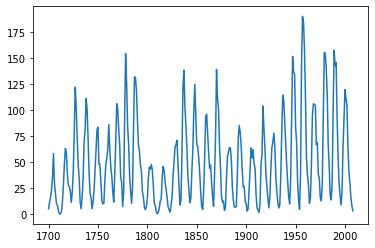

In [5]:
plt.plot(dta.YEAR, dta.SUNACTIVITY)

In [6]:
sunact  = dta.SUNACTIVITY

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

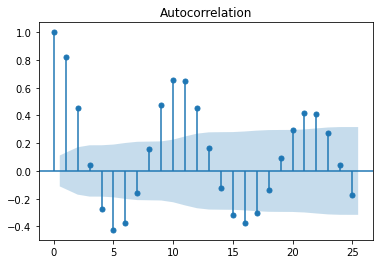

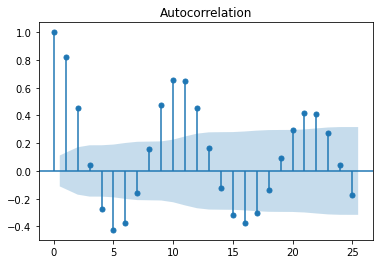

In [9]:
plot_acf(sunact)

In [34]:
sunactD1 = sunact[11:].values-sunact[0:-11].values
sunactD2 = sunactD1[11:]-sunactD1[0:-11]

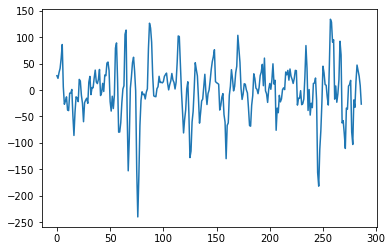

In [35]:
plt.plot(sunactD2)

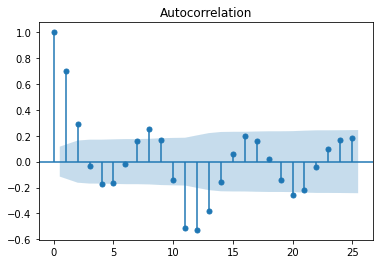

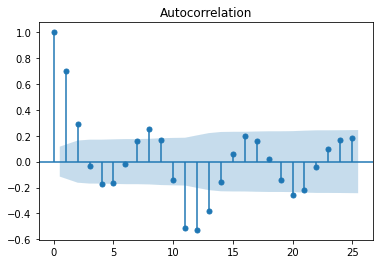

In [36]:
plot_acf(sunactD2)

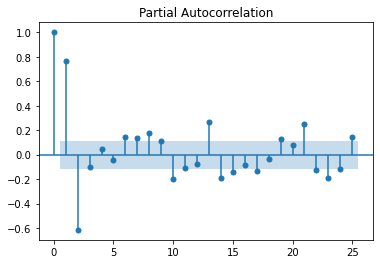

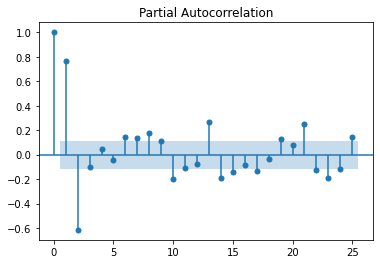

In [29]:
plot_pacf(sunact12)

In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

In [66]:
model1 = SARIMAX(endog = sunact, order=(2,1,3), seasonal_order=(1,1,[1],11))
model1_fit = model1.fit()

D:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [70]:
residuals = model1_fit.resid

(array([  5.,  24.,  49., 103.,  77.,  31.,  11.,   7.,   0.,   2.]),
 array([-42.25133763, -31.30597097, -20.3606043 ,  -9.41523764,
          1.53012903,  12.47549569,  23.42086236,  34.36622902,
         45.31159569,  56.25696235,  67.20232902]),
 <BarContainer object of 10 artists>)

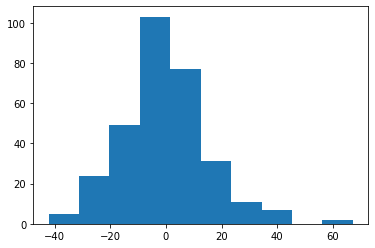

In [71]:
plt.hist(residuals)

In [72]:
from statsmodels.graphics.gofplots import qqplot

[]

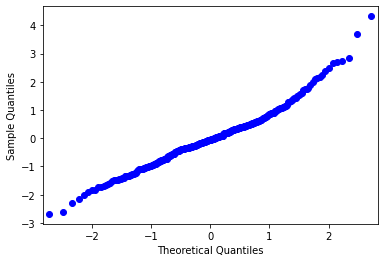

In [73]:
qqplot((residuals-residuals.mean())/residuals.std())
plt.plot()

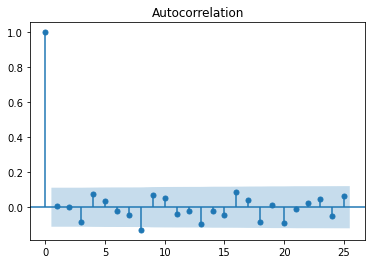

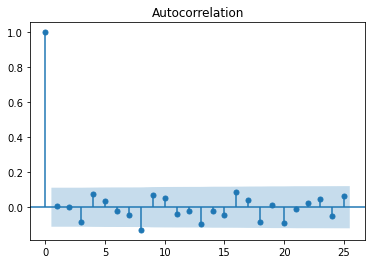

In [74]:
plot_acf(residuals)

In [75]:
model1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                          SUNACTIVITY   No. Observations:                  309
Model:             SARIMAX(2, 1, 3)x(1, 1, [1], 11)   Log Likelihood               -1242.332
Date:                              Thu, 11 Nov 2021   AIC                           2500.665
Time:                                      21:57:44   BIC                           2530.215
Sample:                                           0   HQIC                          2512.495
                                              - 309                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5782      0.040     39.695      0.000       1.500       1.656
ar.L2         -0.9043      0.031    -29.146      0.000      -0.965      -0.843
ma.L1         -1.4203      0.063    -22.577      0.000      -1.544      -1.297
ma.L2          0.4649      0.091      5.093      0.000       0.286       0.644
ma.L3          0.1002      0.062      1.618      0.106      -0.021       0.222
ar.S.L11       0.0301      0.070      0.429      0.668      -0.107       0.168
ma.S.L11      -0.9979      2.096     -0.476      0.634      -5.107       3.111
sigma2       223.7520    463.328      0.483      0.629    -684.354    1131.858
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                52.30
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.36   Skew:                             0.61
Prob(H) (two-sided):                  0.13   Kurtosis:                         4.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<font color='blue'>**OBSERVACION** Prob(Q) es el p-valor del test. Si Prob(Q)>0.05 no hay evidencia suficiente para decir que los residuos no sean estacionarios, Ljung-Box (L1) (Q):es el valor del estadístico <\font>